In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# Load dataset
data = pd.read_csv("/content/sample_data/Car_sales.csv", header=0, index_col=0)

# Drop missing values if any
data = data.dropna()

# Extract the sales column
sales_data = data['Sales_in_thousands']

# Display first few rows
data.head()


,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
Manufacturer,,,,,,,,,,,,,,,
Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
Audi,A6,18.780,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


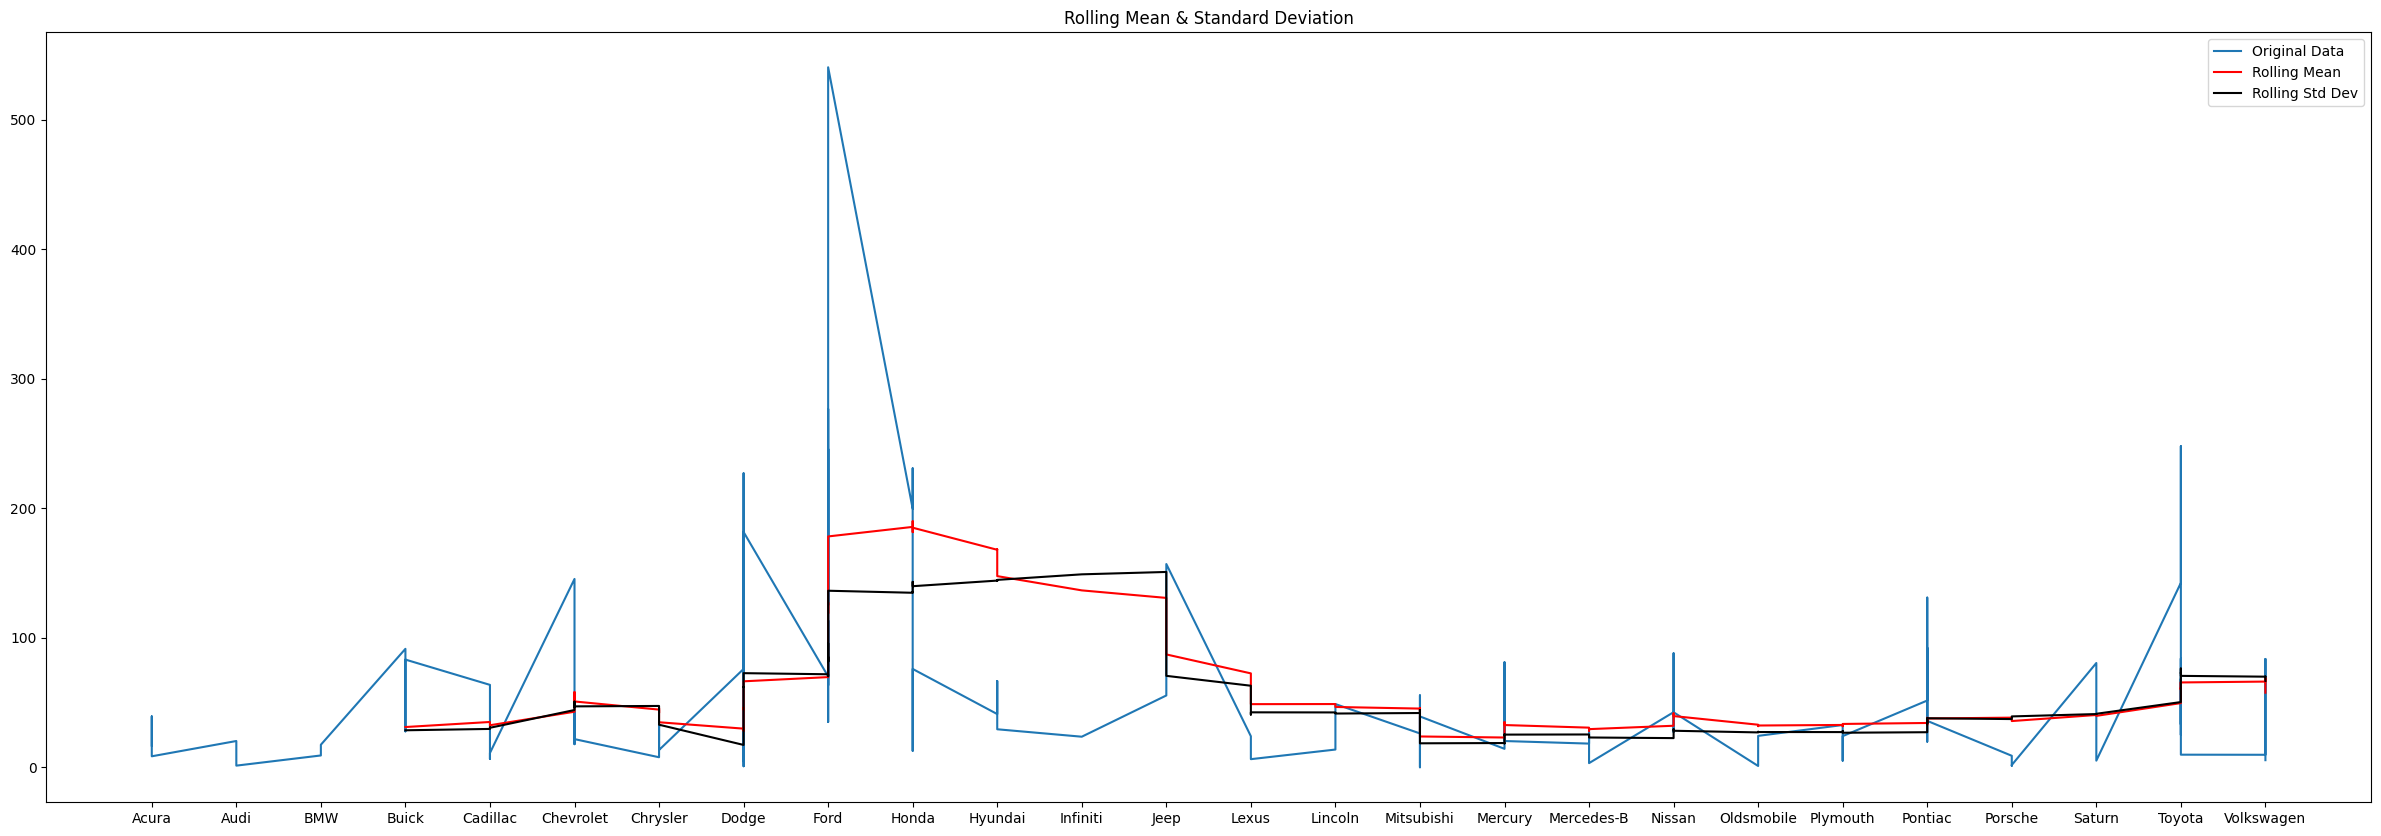

In [15]:
plt.figure(figsize=(30, 10))

rolling_mean = sales_data.rolling(window=12).mean()
rolling_std = sales_data.rolling(window=12).std()

plt.plot(sales_data, label='Original Data')
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std Dev', color='black')

plt.legend()
plt.title('Rolling Mean & Standard Deviation')
plt.show()


In [16]:
print("\n### Augmented Dickey-Fuller (ADF) Test ###")
adf_test = adfuller(sales_data)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
print("Critical Values:")
for key, value in adf_test[4].items():
    print(f"{key}: {value}")

if adf_test[1] <= 0.05:
    print("The data is stationary (reject H0)")
else:
    print("The data is non-stationary (fail to reject H0)")



### Augmented Dickey-Fuller (ADF) Test ###
ADF Statistic: -3.0274909555548914
p-value: 0.032405632245878085
Critical Values:
1%: -3.489589552580676
5%: -2.887477210140433
10%: -2.580604145195395
The data is stationary (reject H0)


In [17]:
from statsmodels.tsa.stattools import kpss

print("\n### KPSS Test ###")
kpss_test = kpss(sales_data, regression='c', nlags='auto')

print(f"KPSS Statistic: {kpss_test[0]}")
print(f"p-value: {kpss_test[1]}")
print("Critical Values:")
for key, value in kpss_test[3].items():
    print(f"{key}: {value}")

if kpss_test[1] > 0.05:
    print("The data is stationary (fail to reject H0)")
else:
    print("The data is non-stationary (reject H0)")



### KPSS Test ###
KPSS Statistic: 0.18782078882307127
p-value: 0.1
Critical Values:
10%: 0.347
5%: 0.463
2.5%: 0.574
1%: 0.739
The data is stationary (fail to reject H0)


<ipython-input-17-f3ed900b4b6c>:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(sales_data, regression='c', nlags='auto')


In [18]:
if adf_test[1] > 0.05 or kpss_test[1] <= 0.05:
    print("\nData appears to be non-stationary. Applying first-order differencing...\n")

    # Apply first-order differencing
    sales_data_diff = sales_data.diff().dropna()

    # Re-run ADF test on differenced data
    print("\n### ADF Test on Differenced Data ###")
    adf_test_diff = adfuller(sales_data_diff)

    print(f"ADF Statistic: {adf_test_diff[0]}")
    print(f"p-value: {adf_test_diff[1]}")
    print("Critical Values:")
    for key, value in adf_test_diff[4].items():
        print(f"{key}: {value}")

    if adf_test_diff[1] <= 0.05:
        print("The differenced data is stationary (reject H0)")
    else:
        print("The differenced data is still non-stationary (fail to reject H0)")

    # Plot differenced data
    plt.figure(figsize=(12, 6))
    plt.plot(sales_data_diff, label='First Order Differencing')
    plt.title("Sales Data After Differencing")
    plt.legend()
    plt.show()
else:
    print("\nData is already stationary, no transformation needed.")



Data is already stationary, no transformation needed.
